In [1]:
!python -V

Python 3.11.9


## Q1. Prepare the dataset

Make the requested modifications to the file [baseline_model_nyc_taxi_data.ipynb](baseline_model_nyc_taxi_data.ipynb)

In [3]:
!ls

baseline_model_nyc_taxi_data.ipynb	homework_5.ipynb  workspace
data					logs
evidently_metrics_calculation_batch.py	model


In [9]:
%run -i baseline_model_nyc_taxi_data.ipynb

Download files:


green_tripdata_2024-04.parquet: 100%|████| 1346502/1346502 [00:07<00:00, 187963.01it/s, save to ./data/green_tripdata_2024-04.parquet]


archivo: green_tripdata_2024-03.parquet cant. filas: 57457, cant columnas: 20


## Q2. Metric

Selected metric -> ColumnSummaryMetric for the column fare_amount

Documentación [Available metrics](https://docs.evidentlyai.com/reference/all-metrics#data-quality)

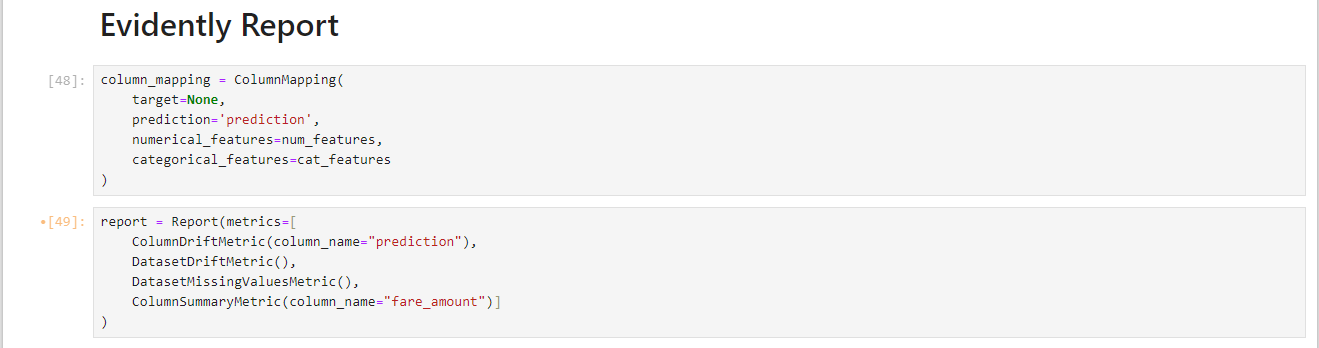

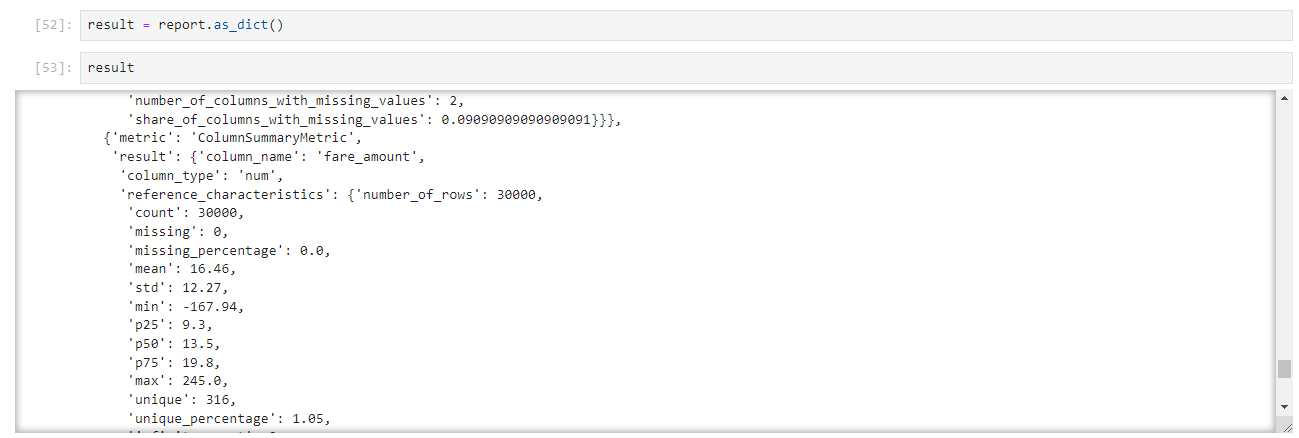

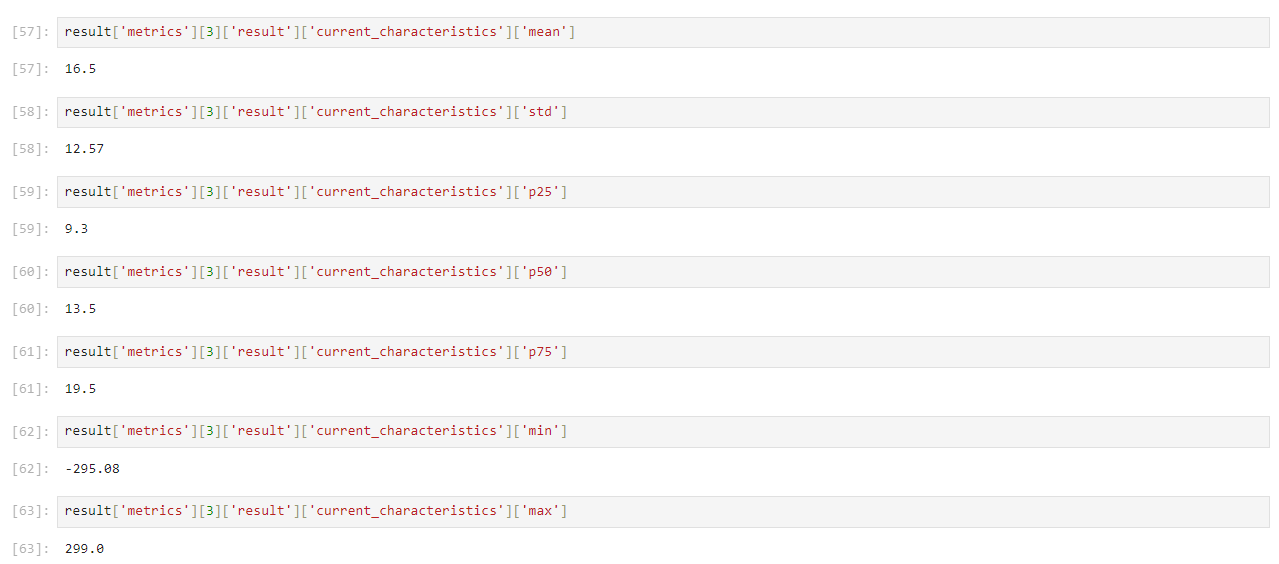

## Q3. Monitoring

Make the requested modifications to the file [evidently_metrics_calculation_batch.py](evidently_metrics_calculation_batch.py)

### Run this command in the terminal

Run docker compose
```
docker compose up -d
```

Verify that services are up
```
docker ps
```

Run python script
```
python evidently_metrics_calculation_batch.py 2024 3
```

Downgrade/remove docker compose services
```
docker compose down
```

In [10]:
!python evidently_metrics_calculation_batch.py 2024 3

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
2024-06-28 23:55:54,764 [INFO]: base de datos creada con éxito
2024-06-28 23:55:54,779 [INFO]: tabla creada con éxito
2024-06-28 23:55:55,237 [INFO]: registros insertados con éxito para la fecha: 2024-03-01
2024-06-28 23:55:57,186 [INFO]: registros insertados con éxito para la fecha: 2024-03-02
2024-06-28 23:55:59,043 [INFO]: registros insertados con éxito para la fecha: 2024-03-03
2024-06-28 23:56:01,212 [INFO]: registros insertados con éxito para la fecha: 2024-03-04
2024-06-28 23:56:03,099 [INFO]: registros insertados con éxito para la fecha: 2024-03-05
2024-06-28 23:56:05,175 [INFO]: registros insertados con éxito para la fecha: 2024-03-06
2024-06-28 23:56:07,189 [INFO]: registros insertados con éxito para la fecha: 2024-03-07
2024-06-28 23:56:09,098 [INFO]: registros insertados con éxito para la fecha: 2024-03-08
2024-06-28 23:56

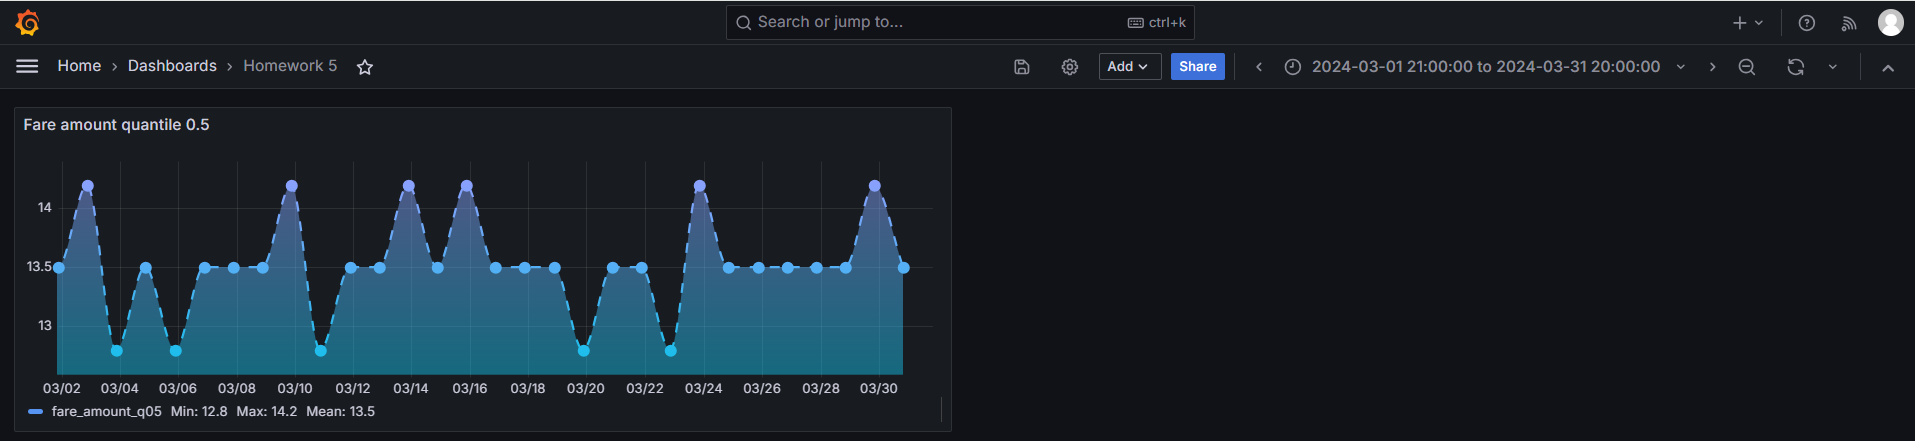

## Q4. Dashboard

### Dashboard configurations are saved in project_folder/dashboards (05-monitoring/dashboards) as json files

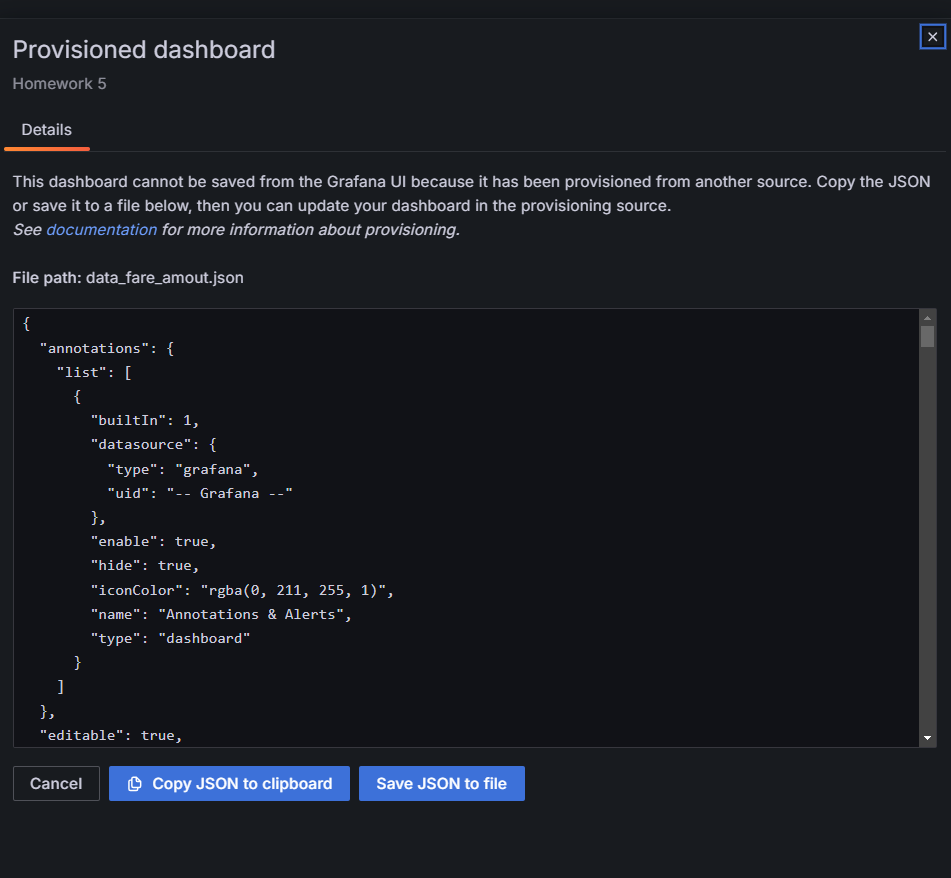


In [16]:
! ls -l ../taxi_monitoring/dashboards

total 24
-rw-rw-r-- 1 joviedo joviedo 11832 Jun 23 00:32 data_drift.json
-rw-r--r-- 1 root    root     8647 Jun 23 22:48 data_fare_amout.json


In [17]:
!cat ../taxi_monitoring/docker-compose.yaml

# documentacion para comprender los comandos ->https://docs.docker.com/compose/


#https://docs.docker.com/compose/compose-file/04-version-and-name/
#version: '2.27'
name: monitoreo_taxi


#https://docs.docker.com/compose/compose-file/07-volumes/
volumes: 
  grafana_data: {}


#https://docs.docker.com/compose/compose-file/06-networks/
networks:
  front-tier:
  back-tier:


#https://docs.docker.com/compose/compose-file/05-services/
services:
  db:
    image: postgres
    restart: always
    environment:
      POSTGRES_PASSWORD: LIsa929322*
    ports:
      - "5432:5432"
    networks:
      - back-tier

  adminer:
    image: adminer
    restart: always
    ports:
      - "8080:8080"
    networks:
      - back-tier
      - front-tier  

  grafana:
    image: grafana/grafana
    user: "472"
    ports:
      - "3000:3000"
    volumes:
      - ./config/grafana_datasources.yaml:/etc/grafana/provisioning/datasources/datasources.yaml:ro
      - ./config/grafana_dashboards.yaml:/etc/grafana/prov